In [6]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

0


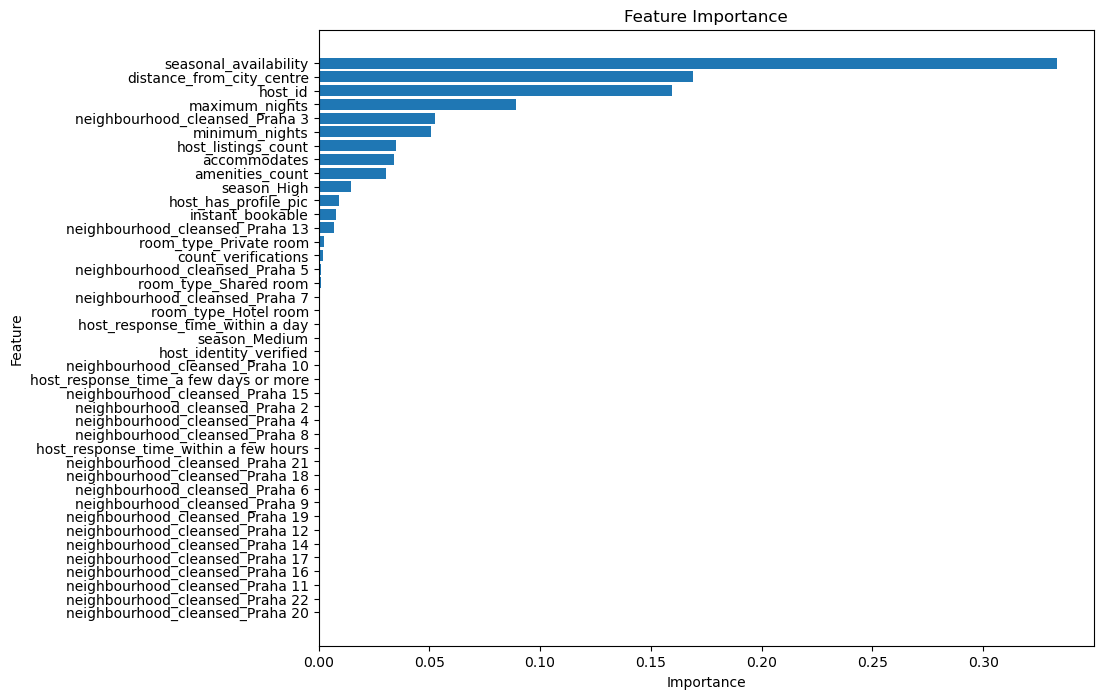

,Feature,Importance
10,seasonal_availability,0.333137
11,distance_from_city_centre,0.169017
0,host_id,0.159325
6,maximum_nights,0.089094
16,neighbourhood_cleansed_Praha 3,0.052712
5,minimum_nights,0.050862
1,host_listings_count,0.034999
4,accommodates,0.033927
8,amenities_count,0.030373
40,season_High,0.014520


In [5]:

# Load the data
data_path = 'C:/Users/filip/OneDrive - Vysoká škola ekonomická v Praze/Plocha/DATA X/data_for_model.pck'
data = pd.read_pickle(data_path)

# Remove columns with any missing values
X = X.dropna(axis=1, how='any')

# Check if there are any remaining missing values
print(X.isnull().sum().sum())  # Should be 0

# Identify numerical and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Return the feature importances
feature_importances.head(10)



In [7]:
y_pred = rf.predict(X_test)

# Výpočet metrik
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R²: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

R²: 0.4406
Mean Absolute Error (MAE): 3031.6808
Root Mean Squared Error (RMSE): 28200.2631
